In [1]:
url='https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [2]:
url

'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [3]:
import os

In [4]:
os.path.basename(url)

'housing.tgz'

In [5]:
# data ingestion


In [6]:
import pandas as pd


In [7]:
csv_file_path=r"C:\Users\win\Desktop\ML project\Machine_learning_project\housing\artifact\data_ingestion\2026-01-20-10-51-06\raw_data\housing.csv"
housing_data_frame=pd.read_csv(csv_file_path)

In [8]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

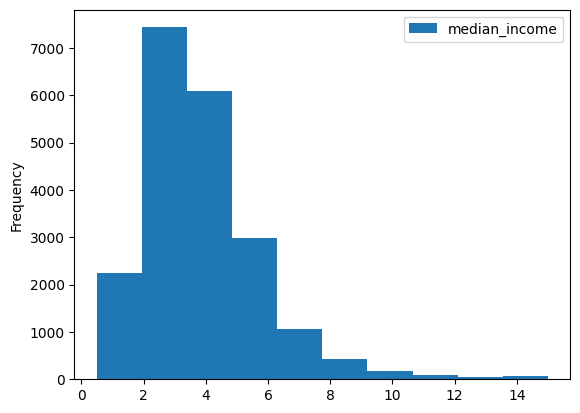

In [9]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [10]:
import numpy as np

In [11]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"], 
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
)

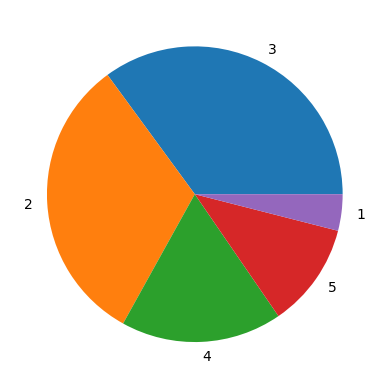

In [12]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [15]:
split.split(housing_data_frame,housing_data_frame["income_cat"])

<generator object BaseShuffleSplit.split at 0x000001AED73B8840>

In [16]:
for train_ix,test_ix in split.split(housing_data_frame,housing_data_frame["income_cat"]):
    print(train_ix,test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [17]:
train_df = housing_data_frame.loc[train_ix]

In [18]:
housing_data_frame.shape

(20640, 11)

In [19]:
train_df.shape

(16512, 11)

In [20]:
test_df = housing_data_frame.loc[test_ix]

In [21]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [22]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [23]:
test_df.shape

(4128, 11)

In [24]:
housing_data_frame.dtypes.index,housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64)],
       dtype=object))

In [25]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace(" ')",""),housing_data_frame.dtypes.values))

In [26]:
column = housing_data_frame.columns

In [27]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}

In [28]:
# 3 4